# ダミーデータの作成

機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

散布図で描くと次のようになるデータを作っていきます。

## 【問題1】乱数の作成

平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
 \left[\begin{array}{cc}
            1.0 & 0.8 \\
            0.8 & 1.0 \\
 \end{array}\right] \quad
$$

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。
作成したndarrayのshapeは(500, 2)になります。

《シード値について》

実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_sumple = 500
s1_mu= [-3,0]
s1_sigma = [[1.0, 0.8],[0.8,1.0]]

s1_values = np.random.multivariate_normal(s1_mu, s1_sigma, n_sumple)
np.random.seed(0)

print(s1_values.shape)
print(s1_values)

(500, 2)
[[-4.80006782e+00 -1.54698618e+00]
 [-4.63714503e+00 -2.19879728e-01]
 [-4.46267867e+00 -2.08076347e+00]
 [-3.85346966e+00 -9.49196365e-01]
 [-3.03192065e+00  2.27764648e-01]
 [-3.59653339e+00  3.23229932e-01]
 [-3.76046080e+00 -6.83506760e-01]
 [-3.52660272e+00 -3.15568548e-01]
 [-4.35253112e+00 -1.48228460e+00]
 [-3.02691331e+00 -5.67090887e-01]
 [-7.84713550e-01  2.62867115e+00]
 [-3.58538300e+00 -1.05476937e+00]
 [-4.69336749e+00 -2.61318911e+00]
 [-2.98421761e+00 -1.02603072e-01]
 [-4.91877408e+00 -9.89469999e-01]
 [-3.26658152e+00 -2.74105461e-02]
 [-1.53138965e+00  2.15844669e-01]
 [-2.71938344e+00  3.79500330e-01]
 [-4.54738211e+00 -7.86930327e-01]
 [-2.53695299e+00  2.71853959e-01]
 [-1.55620621e+00  5.45695585e-01]
 [-1.99817931e+00  2.23559938e+00]
 [-2.37797023e+00  3.44967255e-01]
 [-2.05735800e+00  1.43437007e+00]
 [-1.40164768e+00  1.46380355e+00]
 [-2.27283514e+00  9.71863483e-01]
 [-2.14205902e+00  1.11243624e-01]
 [-3.10871442e+00  1.62186440e-01]
 [-3.158753

## 【問題2】散布図による可視化

問題1で作成したデータ点を散布図により可視化してください。
散布図はmatplotlibのplt.scatter()を使うことで描けます。

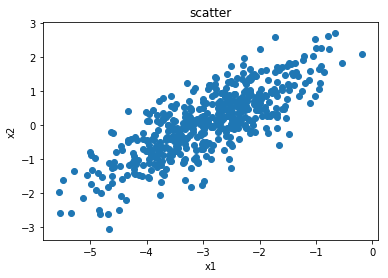

In [6]:
plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(s1_values[:, 0], s1_values[:, 1])
plt.show()



## 【問題3】ヒストグラムによる可視化

問題1で作成したデータをヒストグラムにより可視化してください。
ヒストグラムはplt.hist()を使うことで描けます。

各次元ごとに作成し、2つのヒストグラムとしてください。
それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

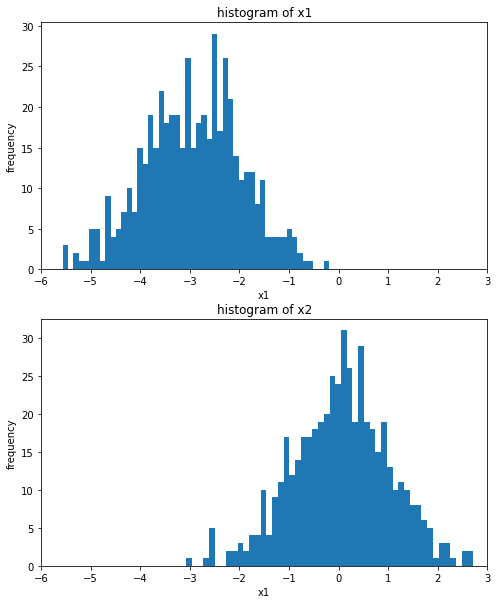

In [9]:
fig , (axL, axR) = plt.subplots(nrows=2, figsize = (8,10))

axL.set_xlim(-6, 3)
axL.set_title("histogram of x1")
axL.set_xlabel("x1")
axL.set_ylabel("frequency")
axL.hist(s1_values[:, 0], bins=50)

axR.set_xlim(-6, 3)
axR.set_title("histogram of x2")
axR.set_xlabel("x1")
axR.set_ylabel("frequency")
axR.hist(s1_values[:, 1], bins=50)


fig.show()


## 【問題4】データの追加

新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
   \left[\begin{array}{cc}
            1.0 & 0.8 \\
            0.8 & 1.0 \\
   \end{array}\right] \quad
$$

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

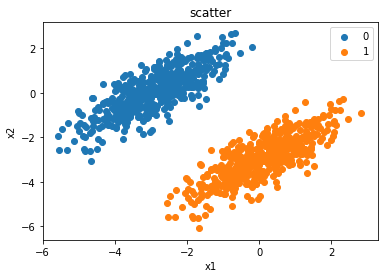

In [11]:

n_sumple = 500
s1_mu= [-3,0]
s1_sigma = [[1.0, 0.8],[0.8,1.0]]

s1_values = np.random.multivariate_normal(s1_mu, s1_sigma, n_sumple)
np.random.seed(0)

n_sumple = 500
s2_mu = [0, -3]
s2_sigma = [[1.0, 0.8], [0.8,1.0]]

s2_values = np.random.multivariate_normal(s2_mu, s2_sigma, n_sumple)
np.random.seed(0)


plt.scatter(s1_values[:, 0], s1_values[:, 1], label = "0")
plt.scatter(s2_values[:, 0], s2_values[:, 1], label = "1")
plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc = "upper right")
plt.show()

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [3]:
merge_data = np.concatenate([s1_values, s2_values], axis = 0)
print(merge_data.shape)

(1000, 2)


## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

《作成例》

データが3個+3個の場合は以下のような(6, 3)のndarrayになります。

In [4]:
label_zeros = np.zeros(500)
label_ones = np.ones(500)
merge_label = np.concatenate([label_zeros, label_ones],axis = 0)

labeling_data = np.concatenate([merge_data, merge_label],axis = 1) 

print(labeling_data)
print(labeling_data.shape)

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]
(1000, 3)
